In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Univariate Analysis


M    414259
F    135809
Name: Gender, dtype: int64


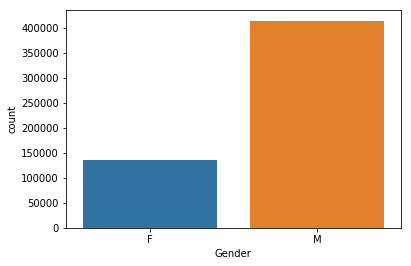

In [6]:
sns.countplot(x='Gender',data= train)
print(train['Gender'].value_counts())

## More men are present

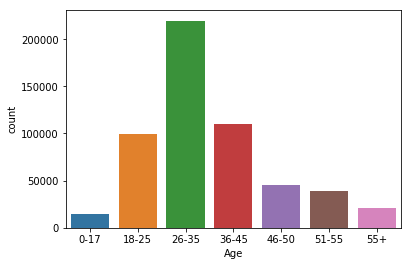

In [7]:

age = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
sns.countplot(x="Age",data=train,order = age)

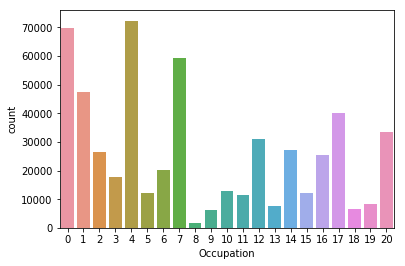

In [8]:
sns.countplot(x='Occupation',data=train)

In [9]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

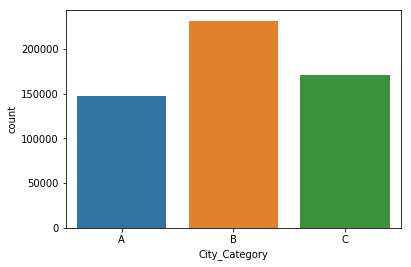

In [10]:
city = ['A','B','C']
sns.countplot(x='City_Category',data=train,order=city)

In [11]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map(lambda x:int(x[0]))


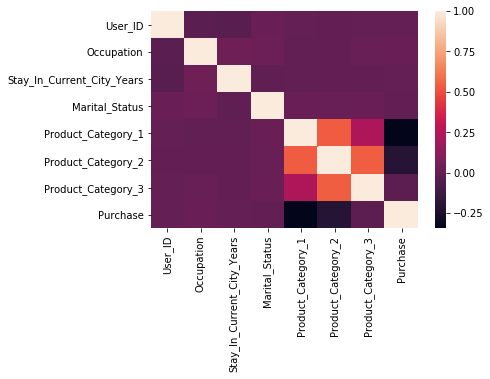

In [18]:
sns.heatmap(train.corr())

In [20]:
train.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,-0.030737,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.030005,0.024280,-0.007618,-0.000384,0.013263,0.020833
Stay_In_Current_City_Years,-0.030737,0.030005,1.000000,-0.012819,-0.004213,-0.001657,0.002093,0.005422
Marital_Status,0.020443,0.024280,-0.012819,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,-0.004213,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,-0.001657,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.002093,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [14]:
train.Age = pd.Categorical(train.Age)

In [173]:
train['Age'] = train.Age.cat.codes+1

In [174]:
train['City_Category'] = pd.Categorical(train.City_Category)
train.City_Category = train.City_Category.cat.codes

In [175]:
train = train.fillna(0)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,1,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,1,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,1,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,1,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,7,16,2,4,0,8,0.0,0.0,7969


In [176]:
train['Gender'][train['Gender']=='F'] = 0
train['Gender'][train['Gender']=='M'] = 1

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [177]:
train.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [178]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,0.0,0.0,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,0.0,0.0,1422
3,0,1,10,0,2,0,12,14.0,0.0,1057
4,1,7,16,2,4,0,8,0.0,0.0,7969


In [179]:
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map(lambda x:int(x[0]))
test.Age = pd.Categorical(test.Age)
test['Age'] = test.Age.cat.codes+1
test['City_Category'] = pd.Categorical(test.City_Category)
test.City_Category = test.City_Category.cat.codes
test = test.fillna(0)
test['Gender'][test['Gender']=='F'] = 0
test['Gender'][test['Gender']=='M'] = 1

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [180]:
df = test.iloc[:,:2]

In [182]:
test.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [185]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [188]:
from sklearn.model_selection import train_test_split as tts

In [189]:
x_train,x_test,y_train,y_test = tts(x,y,random_state=0,test_size=.3)

In [190]:
from sklearn.linear_model import LinearRegression as LR

In [191]:
clf = LR()

In [192]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
clf.score(x_train,y_train)

0.1521533937329026

In [195]:
from sklearn.metrics import r2_score


In [199]:
r2_score(y_test,clf.predict(x_test))

0.15227430696656685

In [211]:
sol = clf.predict(test)

In [212]:
sol = pd.concat([df,pd.DataFrame(sol)],axis=1)

In [219]:
sol.rename(columns={0:'Purchase'},inplace=True)

In [222]:
sol.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,10529.849020
1,1000009,P00113442,9956.465077
2,1000010,P00288442,8579.081452
3,1000010,P00145342,8864.479104
4,1000011,P00053842,10754.814021


In [223]:
sol.to_csv('solution.csv')